In [2]:
# File Handling and Manipulation
import os
import shutil
from PIL import Image

# Data Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# GeoSpatial Data Processing
import rasterio
from rasterio.enums import Resampling
from rasterio.plot import show

# Utilities
import random
from tqdm import tqdm
import textwrap
import ast


AttributeError: module 'numpy' has no attribute '__version__'

In [21]:
metadata_df_1percent = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\Subsets\metadata_1_percent.csv')
metadata_df_10percent = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\Subsets\metadata_10_percent.csv')
metadata_df_50percent = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\Subsets\metadata_50_percent.csv')
metadata_df_original = pd.read_parquet(r'C:\Users\isaac\Downloads\metadata.parquet')

dataset_dir = r'C:\Users\isaac\Desktop\BigEarthTests\Subsets\1%Copy'
original_dataset_dir = r'D:\Datasets\BigEarthNet-S2\100%BigEarthNet'

In [29]:
#unique_labels = metadata_df_original['labels'].explode().unique()
exploded_df = metadata_df_original.explode('labels')

unique_labels = metadata_df_original['labels'].explode().unique()
# Check if the labels are strings and need to be converted
if isinstance(metadata_df_50percent['labels'].iloc[0], str):
    metadata_df_50percent['labels'] = metadata_df_50percent['labels'].apply(ast.literal_eval)

# Get unique class labels
class_labels = metadata_df_50percent['labels'].explode().unique()


exploded_df = metadata_df_50percent.explode('labels')

label_counts = exploded_df['labels'].value_counts()
label_df = label_counts.reset_index()
label_df.columns = ['Label', 'Number of Images']

# Display the table
display(label_df)

,Label,Number of Images
0,Arable land,927
1,Mixed forest,830
2,Coniferous forest,756
3,"Transitional woodland, shrub",691
4,Broad-leaved forest,669
5,"Land principally occupied by agriculture, with...",592
6,Complex cultivation patterns,509
7,Pastures,456
8,Inland waters,333
9,Urban fabric,303


In [30]:
print(unique_labels)

['Arable land' 'Broad-leaved forest' 'Mixed forest' 'Pastures'
 'Inland waters' 'Coniferous forest' 'Complex cultivation patterns'
 'Land principally occupied by agriculture, with significant areas of natural vegetation'
 'Urban fabric' 'Industrial or commercial units' 'Inland wetlands'
 'Transitional woodland, shrub'
 'Natural grassland and sparsely vegetated areas'
 'Moors, heathland and sclerophyllous vegetation' 'Marine waters'
 'Coastal wetlands' 'Permanent crops' 'Beaches, dunes, sands'
 'Agro-forestry areas']


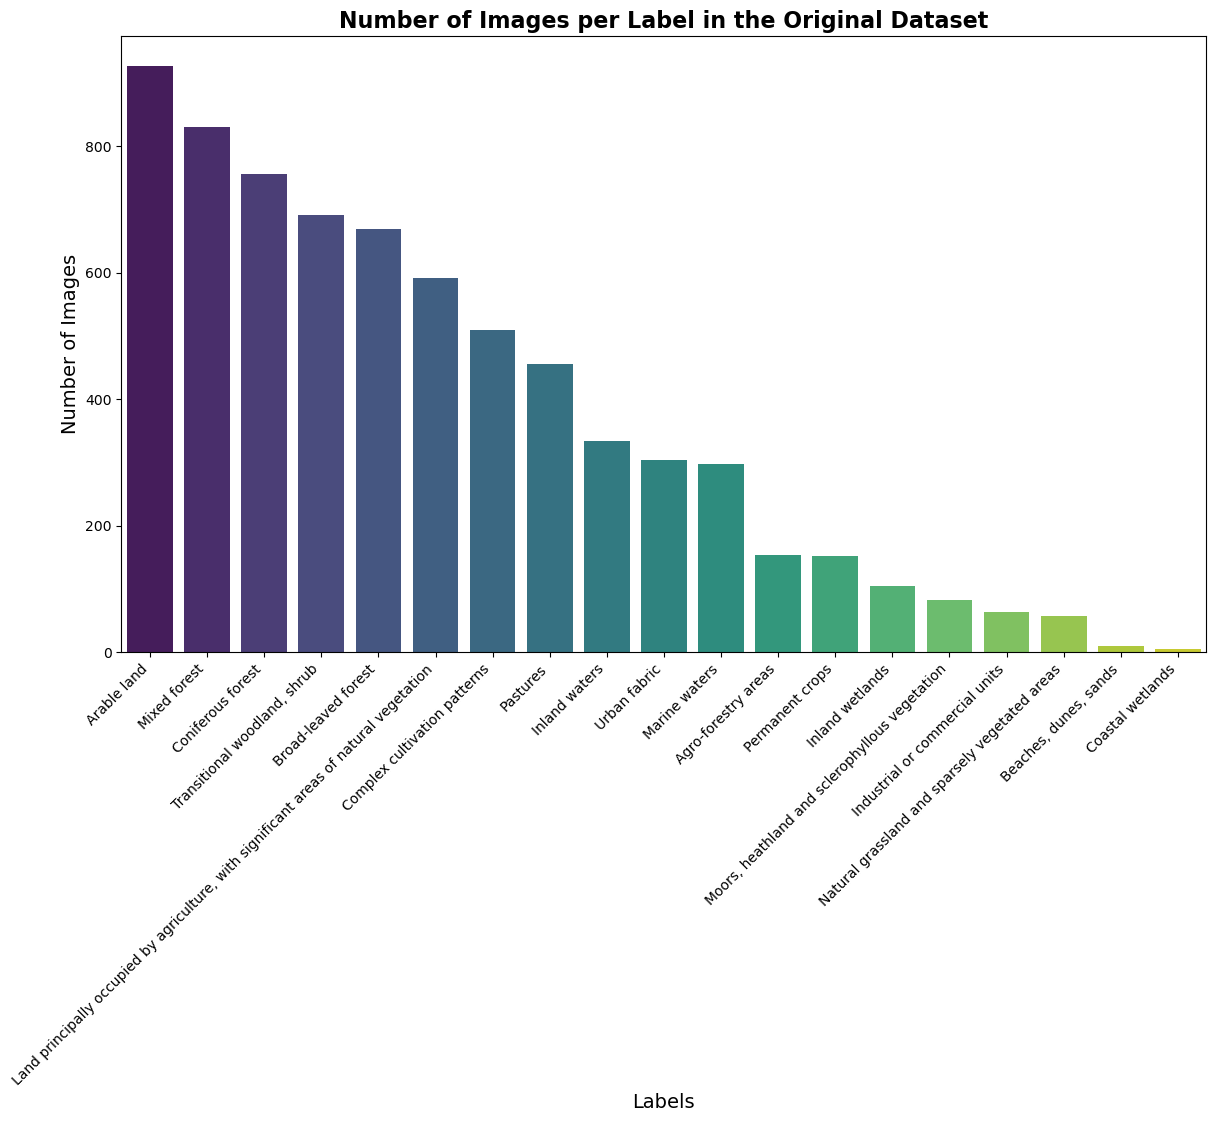

In [32]:
# Function to create a bar plot for the number of images per label
def create_label_bar_plot(metadata_df, title):
    # Explode the labels column
    exploded_df = metadata_df.explode('labels')
    
    # Count the number of images per label
    label_counts = exploded_df['labels'].value_counts()
    label_df = label_counts.reset_index()
    label_df.columns = ['Label', 'Number of Images']
    
    # Create the bar plot
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Label', y='Number of Images', data=label_df, hue='Label', palette='viridis', dodge=False, legend=False)
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel('Labels', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.show()

create_label_bar_plot(metadata_df_50percent, 'Number of Images per Label in the Original Dataset')

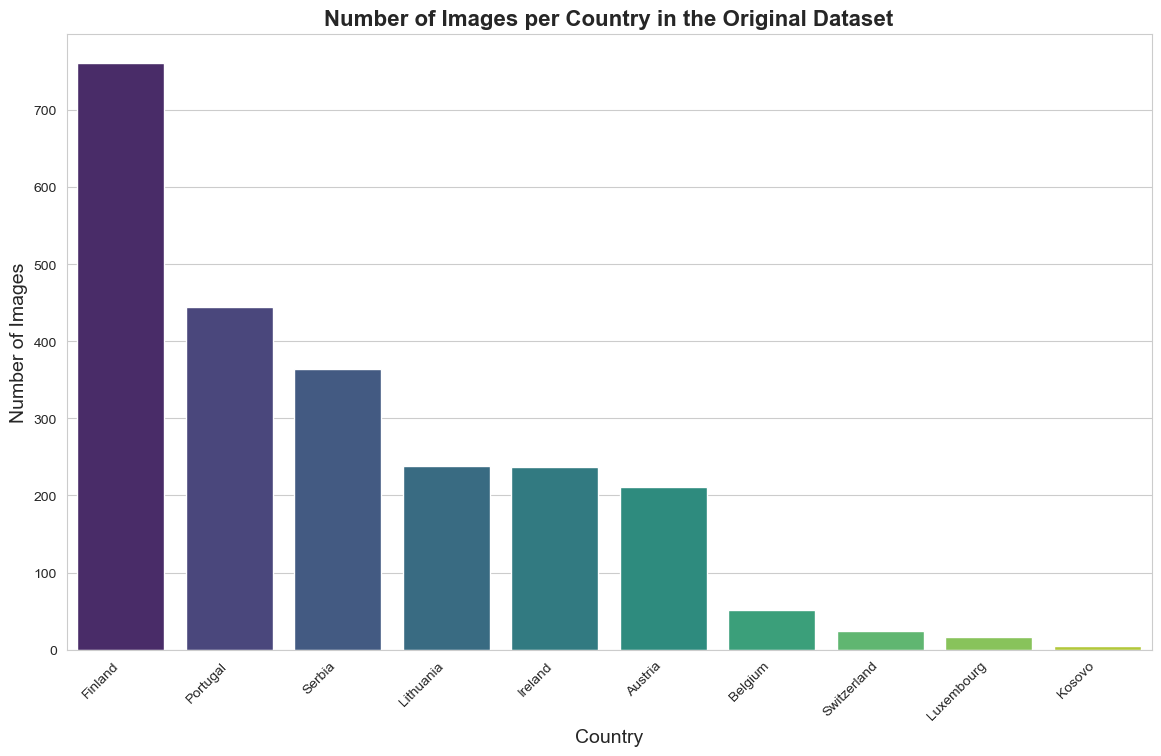

In [33]:
def create_country_bar_plot(metadata_df, title):
    # Count the number of images per country
    country_counts = metadata_df['country'].value_counts()

    # Prepare data for bar graph
    country_df = country_counts.reset_index()
    country_df.columns = ['Country', 'Number of Images']
    sns.set_style("whitegrid")

    # Create the bar graph
    plt.figure(figsize=(14, 8))  

    # Plot the bar graph
    ax = sns.barplot(x='Country', y='Number of Images', data=country_df, hue='Country', palette='viridis', dodge=False, legend=False)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.title(title, fontsize=16, weight='bold')
    plt.xticks(rotation=45, ha='right')

    # Display the bar graph
    plt.show()

create_country_bar_plot(metadata_df_50percent, 'Number of Images per Country in the Original Dataset')

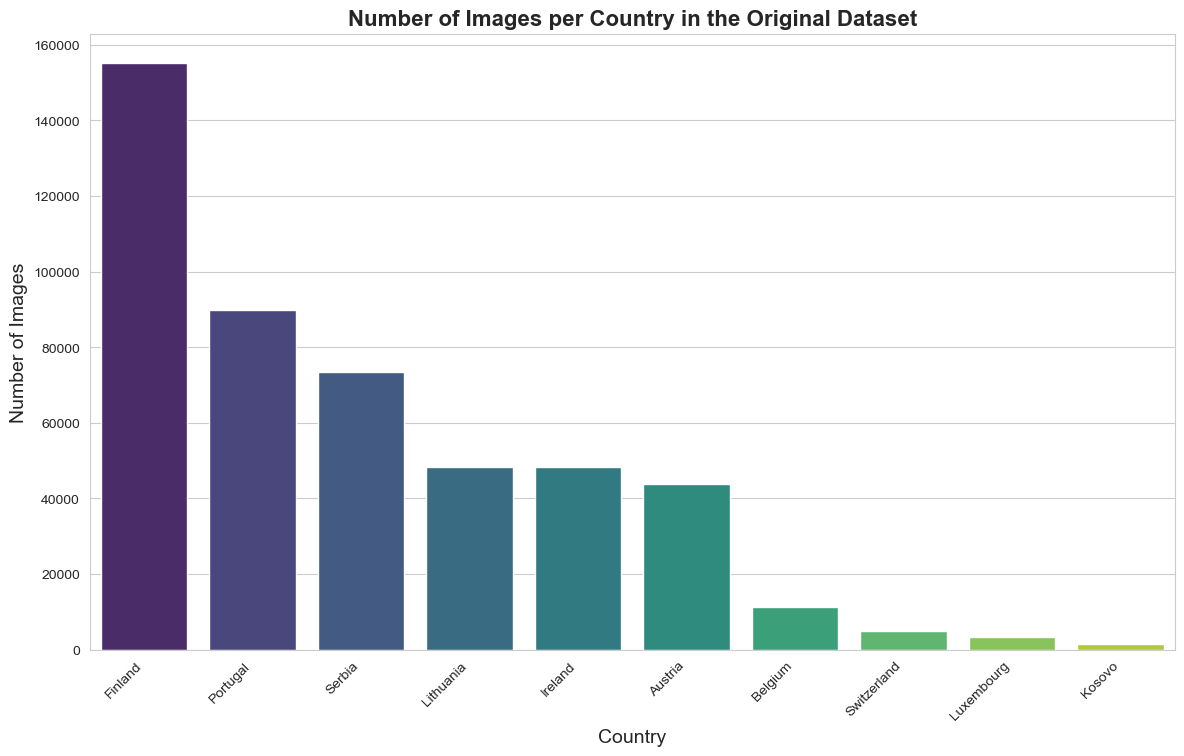

In [ ]:
def create_country_bar_plot(metadata_df, title):
    # Count the number of images per country
    country_counts = metadata_df['country'].value_counts()

    # Prepare data for bar graph
    country_df = country_counts.reset_index()
    country_df.columns = ['Country', 'Number of Images']
    sns.set_style("whitegrid")

    # Create the bar graph
    plt.figure(figsize=(14, 8))  

    # Plot the bar graph
    ax = sns.barplot(x='Country', y='Number of Images', data=country_df, hue='Country', palette='viridis', dodge=False, legend=False)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.title(title, fontsize=16, weight='bold')
    plt.xticks(rotation=45, ha='right')

    # Display the bar graph
    plt.show()

create_country_bar_plot(metadata_df_original, 'Number of Images per Country in the Original Dataset')

Total number of records: 2352


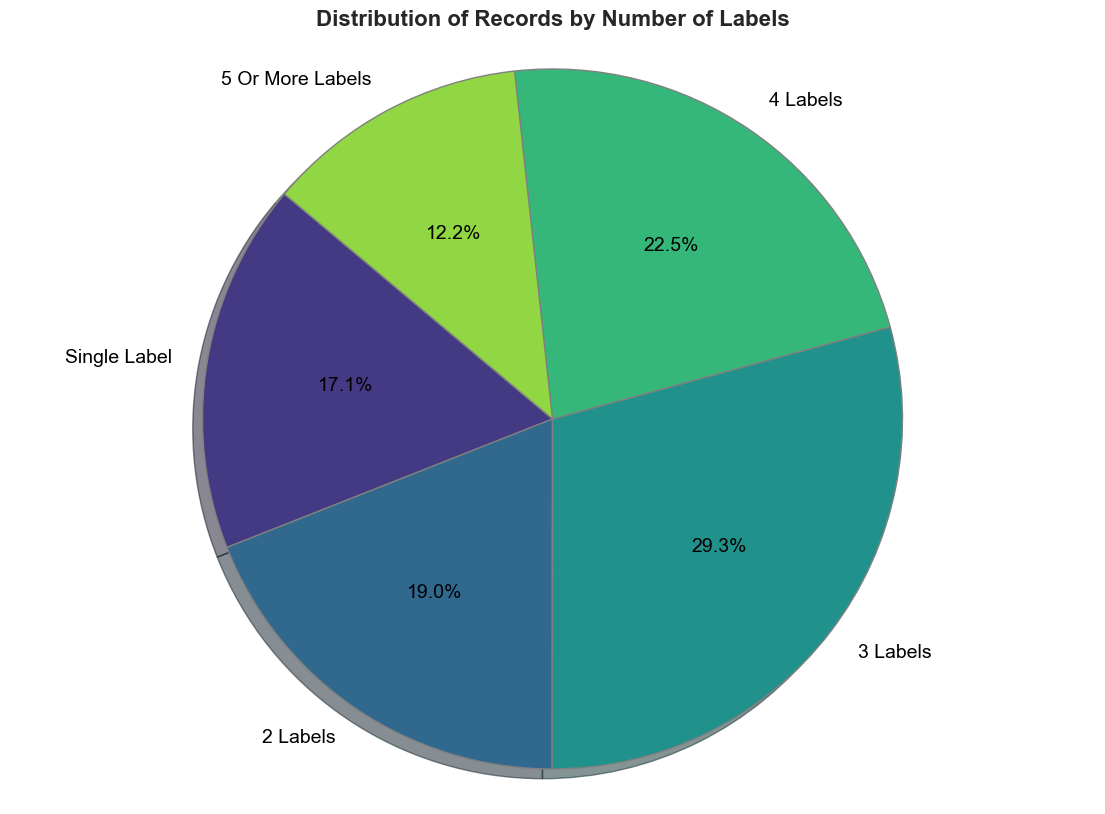

In [34]:
def plot_label_distribution(metadata_df):
    metadata_df['labels'] = metadata_df['labels'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
    # Count the number of labels per record
    metadata_df['label_count'] = metadata_df['labels'].apply(len)

    # Get the counts for each label count
    single_label_count = metadata_df[metadata_df['label_count'] == 1].shape[0]
    two_labels_count = metadata_df[metadata_df['label_count'] == 2].shape[0]
    three_labels_count = metadata_df[metadata_df['label_count'] == 3].shape[0]
    four_labels_count = metadata_df[metadata_df['label_count'] == 4].shape[0]
    five_labels_count = metadata_df[metadata_df['label_count'] >= 5].shape[0]

    # Calculate the total number of records
    total_records = (single_label_count + two_labels_count + three_labels_count +
                     four_labels_count + five_labels_count)
    print(f"Total number of records: {total_records}")
    sns.set_style("whitegrid")

    # Data for the pie chart
    sizes = [single_label_count, two_labels_count, three_labels_count, four_labels_count, five_labels_count]
    labels = ['Single Label', '2 Labels', '3 Labels', '4 Labels', '5 Or More Labels']
    colors = sns.color_palette('viridis', len(sizes))  # Adjust the number of colors as needed

    # Create the pie chart
    plt.figure(figsize=(14, 10))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
            shadow=True, textprops={'fontsize': 14, 'color': 'black'}, wedgeprops={'edgecolor': 'grey'})

    # Title of the pie chart
    plt.title('Distribution of Records by Number of Labels', fontsize=16, weight='bold')

    # Display the pie chart
    plt.axis('equal')  
    plt.show()

plot_label_distribution(metadata_df_50percent)

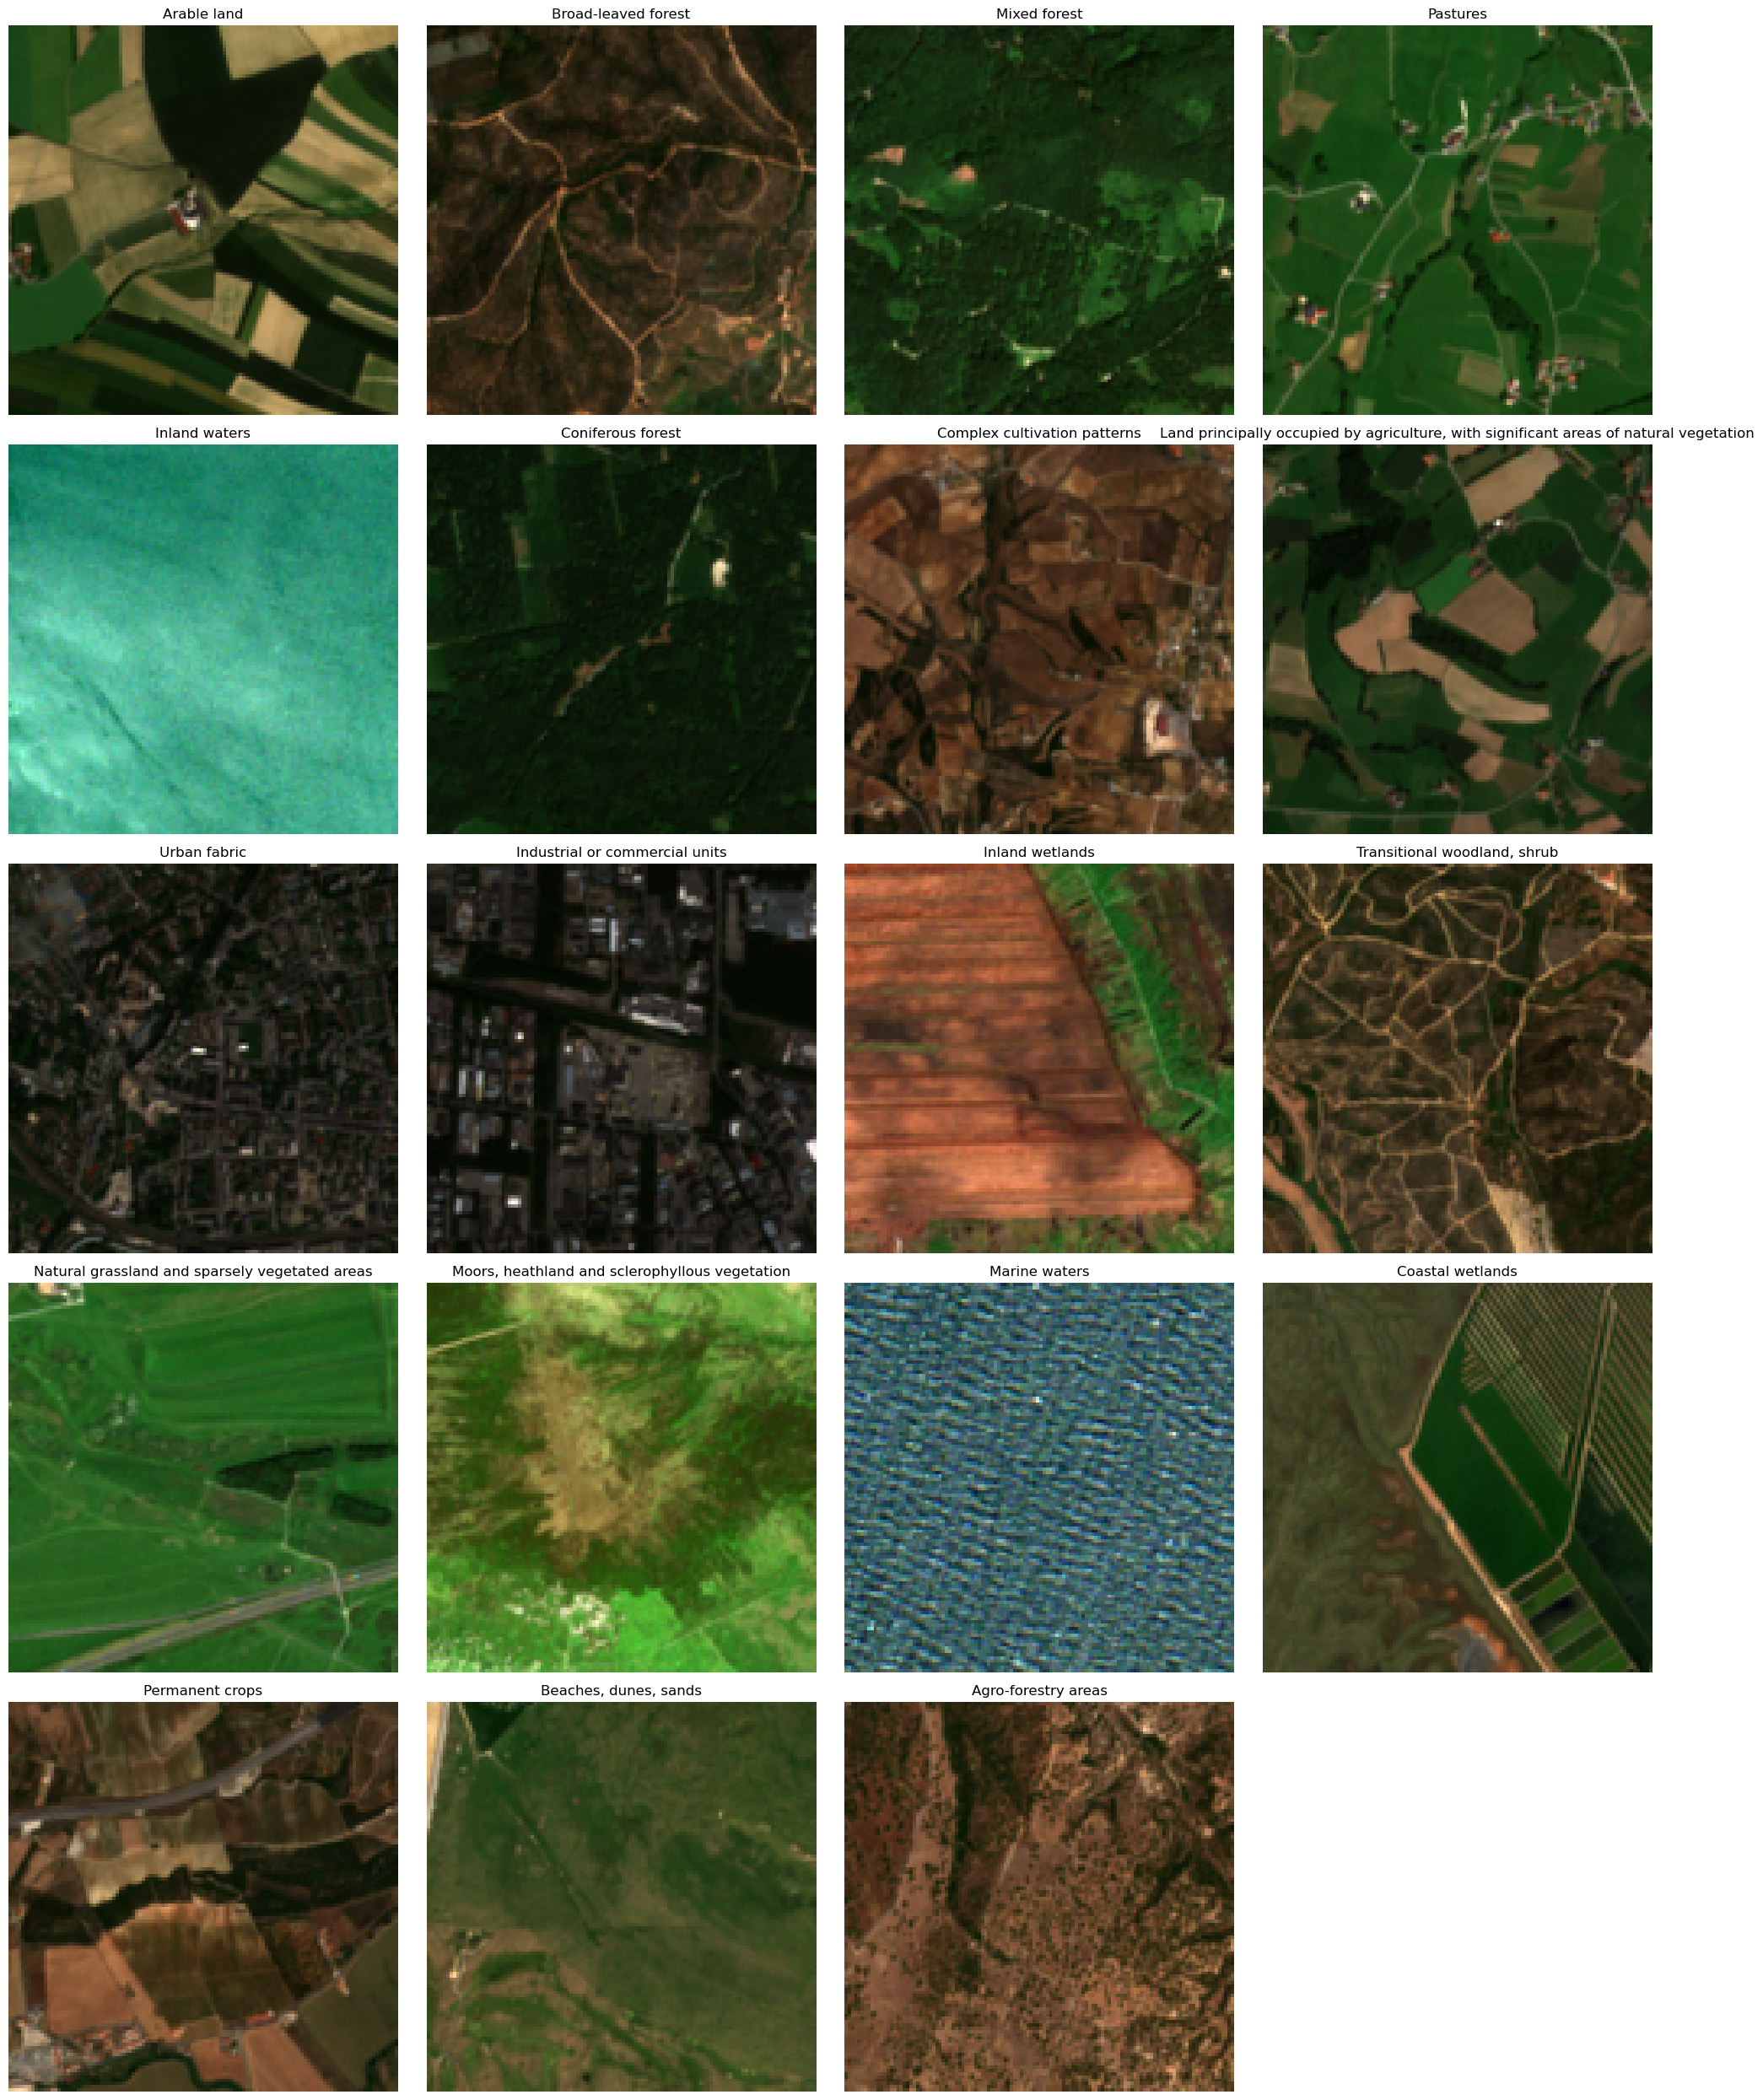

In [28]:
# Convert numpy.ndarray to list if necessary
metadata_df_original['labels'] = metadata_df_original['labels'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)

# Filter the DataFrame to get rows with exactly one label
single_label_df = metadata_df_original[metadata_df_original['labels'].apply(len) == 1]

# Dictionary to store the first patch_id for each label
first_patch_ids = {}

# Iterate through each unique label and find the first patch_id with that label
for label in unique_labels:
    filtered_df = single_label_df[single_label_df['labels'].apply(lambda x: x[0] == label)]
    if not filtered_df.empty:
        first_patch_id = filtered_df.iloc[0]['patch_id']
        first_patch_ids[label] = first_patch_id

# Function to read and stack 3 bands
def read_bands(patch_id, bands=['B04', 'B03', 'B02']):
    base_patch_id = '_'.join(patch_id.split('_')[:-2])
    band_paths = [os.path.join(original_dataset_dir, base_patch_id, patch_id, f"{patch_id}_{band}.tif") for band in bands]
    stacked_bands = []
    for band_path in band_paths:
        with rasterio.open(band_path) as src:
            band = src.read(1)
            stacked_bands.append(band)
    image = np.stack(stacked_bands, axis=-1)
    # Normalize the image to the range [0, 1]
    image = (image - image.min()) / (image.max() - image.min())
    return image

# Plotting the images in a grid
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.flatten()

for i, (label, patch_id) in enumerate(first_patch_ids.items()):
    image = read_bands(patch_id)
    axes[i].imshow(image)
    axes[i].set_title(label)
    axes[i].axis('off')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

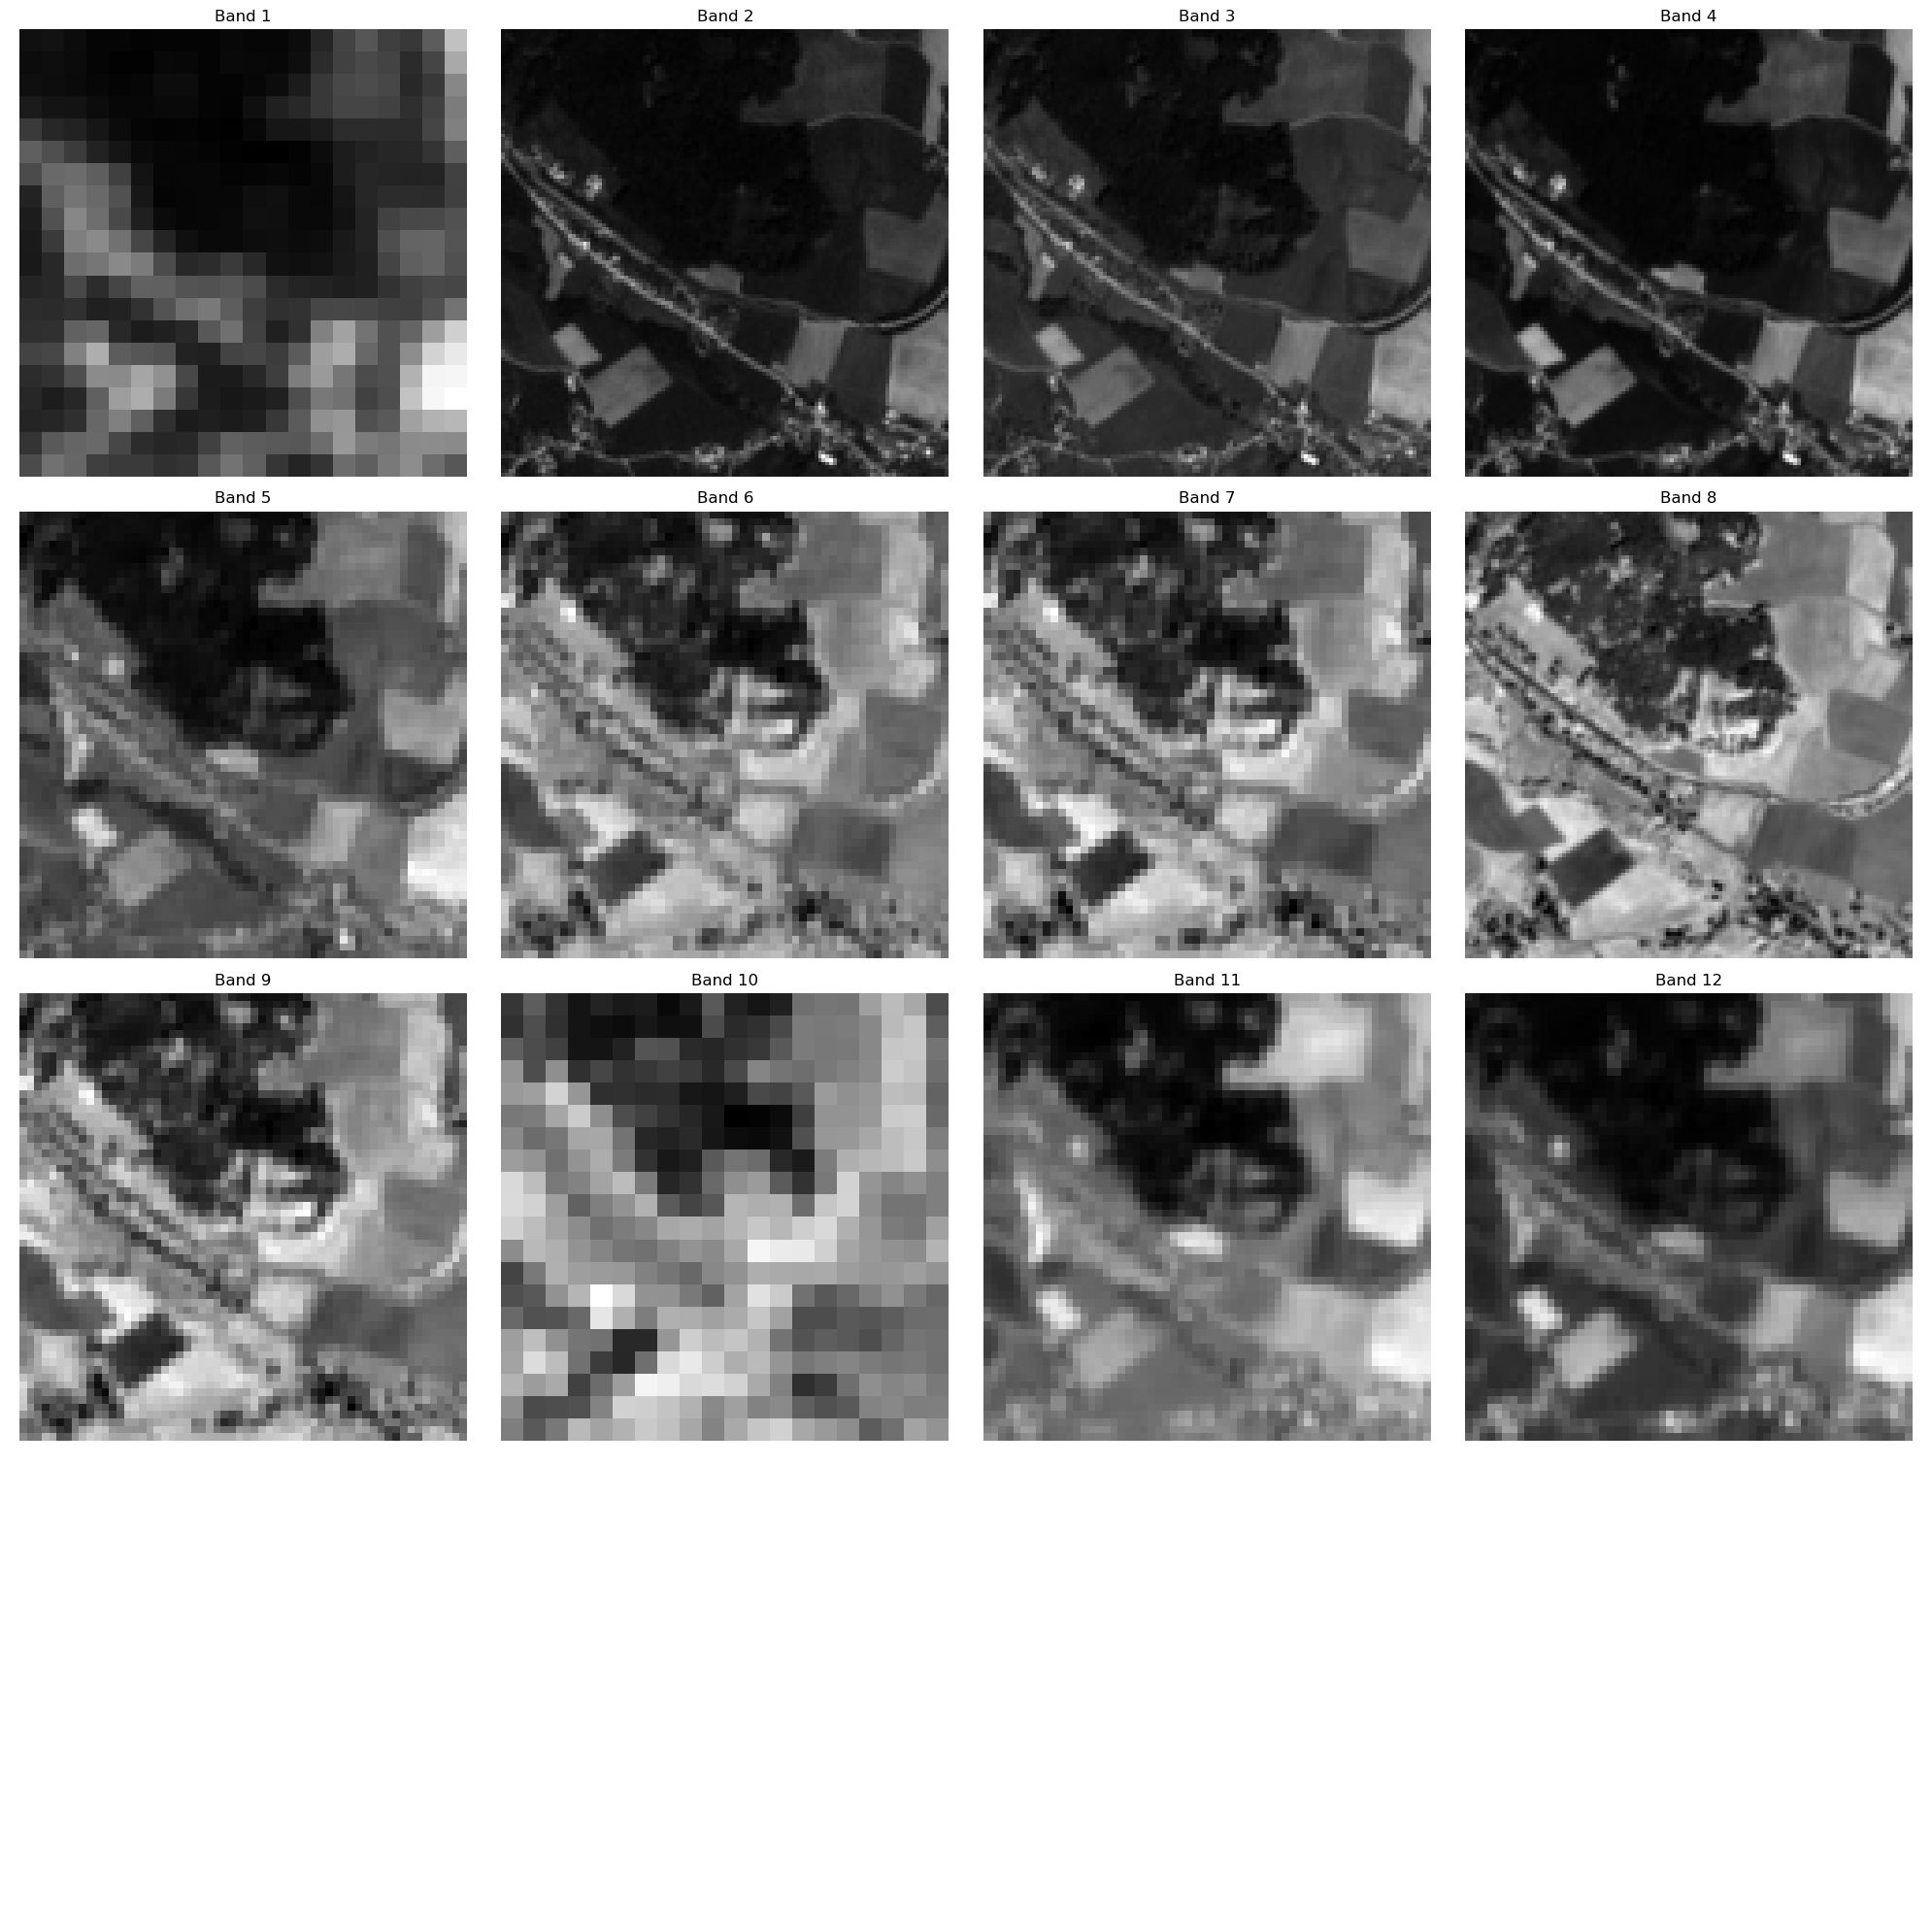

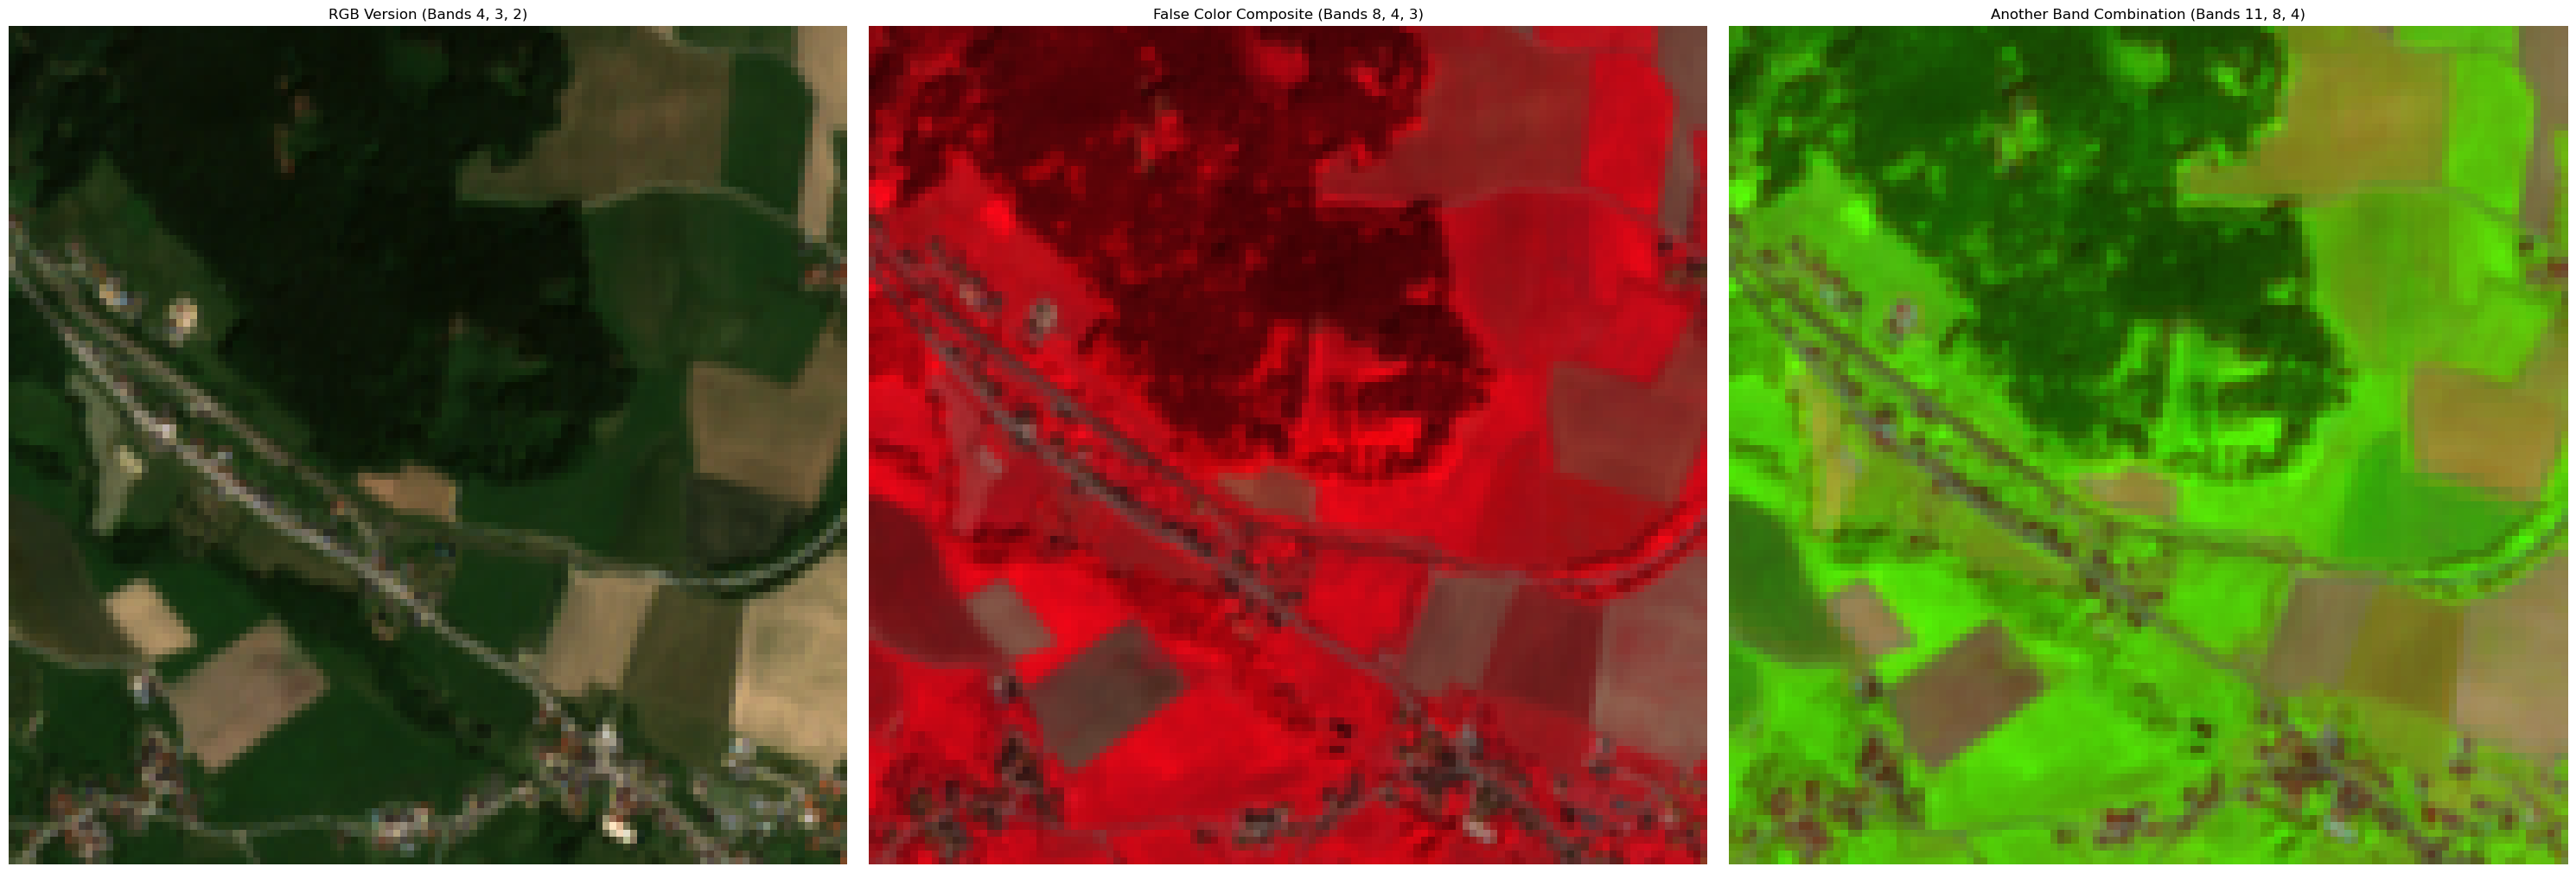

In [40]:
# Path to the combined 13-band TIFF file
tif_path = r'C:\Users\isaac\Desktop\Small\CombinedImages\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP\S2A_MSIL2A_20170613T101031_N9999_R022_T33UUP_80_58.tif'

# Read the combined 13-band TIFF file
with rasterio.open(tif_path) as src:
    combined_image = src.read()

# Number of bands
num_bands = combined_image.shape[0]

# Plot the individual bands
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

for i in range(num_bands):
    axes[i].imshow(combined_image[i], cmap='gray')
    axes[i].set_title(f'Band {i+1}')
    axes[i].axis('off')

# Hide any remaining empty subplots
for j in range(num_bands, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Extract the RGB bands (assuming bands 4, 3, and 2 for Sentinel-2)
rgb_image = np.stack([combined_image[3], combined_image[2], combined_image[1]], axis=-1)

# Normalize the RGB image to the range [0, 1]
rgb_image = (rgb_image - rgb_image.min()) / (rgb_image.max() - rgb_image.min())

# Plot the RGB version and other band combinations
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Plot the RGB version
axes[0].imshow(rgb_image)
axes[0].set_title('RGB Version (Bands 4, 3, 2)')
axes[0].axis('off')

# Plot a false color composite (e.g., Bands 8, 4, 3 for Sentinel-2)
false_color_image = np.stack([combined_image[7], combined_image[3], combined_image[2]], axis=-1)
false_color_image = (false_color_image - false_color_image.min()) / (false_color_image.max() - false_color_image.min())
axes[1].imshow(false_color_image)
axes[1].set_title('False Color Composite (Bands 8, 4, 3)')
axes[1].axis('off')

# Plot another band combination (e.g., Bands 11, 8, 4 for Sentinel-2)
another_combination_image = np.stack([combined_image[10], combined_image[7], combined_image[3]], axis=-1)
another_combination_image = (another_combination_image - another_combination_image.min()) / (another_combination_image.max() - another_combination_image.min())
axes[2].imshow(another_combination_image)
axes[2].set_title('Another Band Combination (Bands 11, 8, 4)')
axes[2].axis('off')

plt.tight_layout()
plt.show()